<b>Analysis of Medium Blogs<b>

Medium is an publishing platform which provides an active community for people to share their ideas and stories with each other. This dataset contains the information about articles published by some prominent publications in the year 2020. We will conduct an exploratory data analysis to gain some insights from the data which could be useful for someone who would want to start their journey of publishing articles on Medium.

I will be using some python libraries like pandas, numpy, seaborn etc. for this analysis

In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import datetime
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the data

medium=pd.read_csv("medium_data.csv")

In [3]:
#Check size of the dataset

medium.shape

(11642, 9)

In [4]:
#Getting familiar with the datset

medium.head()

,id,url,title,subtitle,claps,responses,reading_time,publication,date
0,1,https://medium.datadriveninvestor.com/is-fasta...,Is FastAPI going to replace Django?,NaN,226,4,4,Data Driven Investor,2020-05-24
1,2,https://medium.datadriveninvestor.com/whats-th...,What’s the Best Way to Buy a Reliable Luxury Car?,The full cost of ownership makes buying brand-...,186,3,10,Data Driven Investor,2020-05-24
2,3,https://medium.datadriveninvestor.com/credit-r...,Credit Risk Assessment,NaN,76,0,7,Data Driven Investor,2020-05-24
3,4,https://medium.datadriveninvestor.com/cash-is-...,Cash is Trash or Cash is King? What´s it gonna...,NaN,139,0,6,Data Driven Investor,2020-05-24
4,5,https://medium.datadriveninvestor.com/how-to-b...,How to be Flipin’ awesome for your fans,Flipboard magazines capitalize on marketing vi...,34,0,5,Data Driven Investor,2020-05-24


In [5]:
#Getting information about columns in the dataset

medium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11642 entries, 0 to 11641
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            11642 non-null  int64 
 1   url           11642 non-null  object
 2   title         11642 non-null  object
 3   subtitle      6486 non-null   object
 4   claps         11642 non-null  int64 
 5   responses     11642 non-null  int64 
 6   reading_time  11642 non-null  int64 
 7   publication   11642 non-null  object
 8   date          11642 non-null  object
dtypes: int64(4), object(5)
memory usage: 818.7+ KB


We can understand from the info that date column has object datatype, we need to convert to datetime type to use it for further analysis. Before that, we will create a copy of the dataset, as it is not a good practice to work on original dataset

In [6]:
#Copying the dataset and checking if it's correctly copied

medium_df=medium.copy()
medium_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11642 entries, 0 to 11641
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            11642 non-null  int64 
 1   url           11642 non-null  object
 2   title         11642 non-null  object
 3   subtitle      6486 non-null   object
 4   claps         11642 non-null  int64 
 5   responses     11642 non-null  int64 
 6   reading_time  11642 non-null  int64 
 7   publication   11642 non-null  object
 8   date          11642 non-null  object
dtypes: int64(4), object(5)
memory usage: 818.7+ KB


In [7]:
#Converting datatype of date column

medium_df["date"]=pd.to_datetime(medium_df["date"])
medium_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11642 entries, 0 to 11641
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            11642 non-null  int64         
 1   url           11642 non-null  object        
 2   title         11642 non-null  object        
 3   subtitle      6486 non-null   object        
 4   claps         11642 non-null  int64         
 5   responses     11642 non-null  int64         
 6   reading_time  11642 non-null  int64         
 7   publication   11642 non-null  object        
 8   date          11642 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 818.7+ KB


In [8]:
#Checking for duplicate values

medium_df[medium_df.duplicated(["title","publication"])]

,id,url,title,subtitle,claps,responses,reading_time,publication,date
353,354,https://betterhumans.pub/how-i-completely-tran...,How I Completely Transformed My Body in One Year,"And if I can do it, you definitely can",22000,105,11,Better Humans,2020-01-03
354,355,https://betterhumans.pub/my-21-day-omad-journe...,My 21 Day OMAD Journey to Weight Loss and Emot...,How this eating plan can help you…,1300,7,10,Better Humans,2020-01-03
355,356,https://betterhumans.pub/the-biology-of-mindfu...,The Biology of Mindfulness and Mindlessness — ...,Powerful evidence based…,6200,29,11,Better Humans,2020-01-03
356,357,https://betterhumans.pub/the-best-time-of-day-...,The Best Time of Day to Hit the Gym May Surpri...,How scheduling your workouts differently can…,3300,18,10,Better Humans,2020-01-03
357,358,https://betterhumans.pub/how-to-set-up-your-wi...,How to Set Up Your Windows 10 PC to Maximize P...,Save time and end distractions with this…,1300,7,12,Better Humans,2020-01-03
...,...,...,...,...,...,...,...,...,...
11344,11345,https://betterhumans.pub/this-is-how-to-succes...,This is How to Successfully Move to Another Co...,A blueprint for happiness beyond the American…,1200,7,11,Better Humans,2020-10-31
11402,11403,https://medium.datadriveninvestor.com/big-o-no...,Big O Notation,Arrays and their Built-in Methods,76,0,4,Data Driven Investor,2020-11-02
11434,11435,https://bettermarketing.pub/how-bikini-outrage...,How Bikini Outrage Became a Crude Marketer’s B...,Exploring the value in reactionary branding.,2600,12,5,Better Marketing,2020-11-02
11435,11436,https://bettermarketing.pub/linkedin-has-effec...,LinkedIn Has Effectively Deactivated a Core Fe...,It’s a problem — and an…,4300,20,6,Better Marketing,2020-11-02


In [9]:
#Dropping Duplicate rows and confirming

medium_df.drop_duplicates(subset=["title","publication"], keep="first", inplace=True)
medium_df[medium_df.duplicated(["title","publication"])]

,id,url,title,subtitle,claps,responses,reading_time,publication,date


In [10]:
#Retrieving month,day,titlelength
#Creating with_subtitle to determind if the article has subtitle or not

medium_df["title_length"]=medium_df["title"].apply(len)
medium_df['month'] = pd.DatetimeIndex(medium_df['date']).month
medium_df['day'] = pd.DatetimeIndex(medium_df['date']).day

medium_df["with_subtitle"]=np.where(medium_df["subtitle"].isnull(),"No","Yes")

In [11]:
#Sorting values by month

medium_df.sort_values(by= 'month', ascending = True).reset_index()


,index,id,url,title,subtitle,claps,responses,reading_time,publication,date,title_length,month,day,with_subtitle
0,3613,3614,https://medium.com/swlh/why-happiness-doesnt-c...,Why Happiness Doesn’t Come in Square Feet,…you would eat onion leaves or water-lily stem...,67,0,7,The Startup,2020-01-23,41,1,23,Yes
1,7823,7824,https://medium.com/swlh/things-i-learned-from-...,Things I Learned from a Year of Working as a R...,NaN,215,1,10,The Startup,2020-01-15,62,1,15,No
2,7824,7825,https://medium.com/swlh/how-to-write-a-book-re...,How To Write A Book Review,Have you ever wanted to write a book review? N...,80,3,6,The Startup,2020-01-15,26,1,15,Yes
3,7825,7826,https://medium.com/swlh/essential-git-fu-for-t...,Essential Git fu for technical writers,"Nope, this is not another Git tutorial. I want...",118,0,6,The Startup,2020-01-15,38,1,15,Yes
4,7826,7827,https://medium.com/swlh/value-and-reference-ty...,Value and Reference Types in Swift,Copy or reference?,81,0,6,The Startup,2020-01-15,34,1,15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11300,148,149,https://medium.datadriveninvestor.com/life-les...,Life lessons to be learnt from Kung Fu Panda,NaN,81,0,11,Data Driven Investor,2020-12-29,44,12,29,No
11301,149,150,https://medium.datadriveninvestor.com/can-whit...,Can White People Be Terrorists?,"In America, the Answer Seems to be NO!",623,10,4,Data Driven Investor,2020-12-29,31,12,29,Yes
11302,150,151,https://medium.datadriveninvestor.com/5-most-i...,5 Most Influential Books I Read in 2020,NaN,244,6,14,Data Driven Investor,2020-12-29,39,12,29,No
11303,1835,1836,https://medium.com/swlh/bash-speedup-14179a2dba68,Bash Speedup,NaN,33,0,5,The Startup,2020-12-24,12,12,24,No


<b>Exploratory Data Analysis<b>

Let us conduct some exploratory data analysis

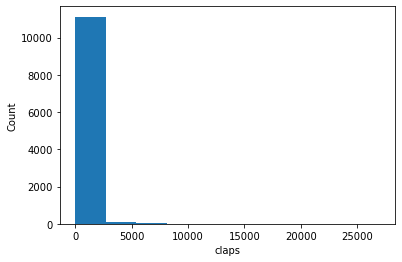

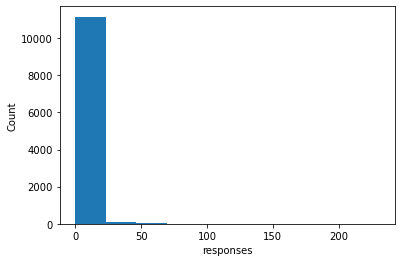

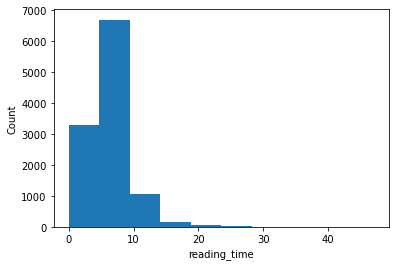

In [13]:
#Check the distribution of claps,responses and reading time column

cols=["claps","responses","reading_time"]

for k in cols:
    plt.hist(medium_df[k])
    plt.ylabel("Count")
    plt.xlabel(k)
    plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Data Driven Investor'),
  Text(1, 0, 'Better Humans'),
  Text(2, 0, 'Better Marketing'),
  Text(3, 0, 'UX Collective'),
  Text(4, 0, 'The Startup')])

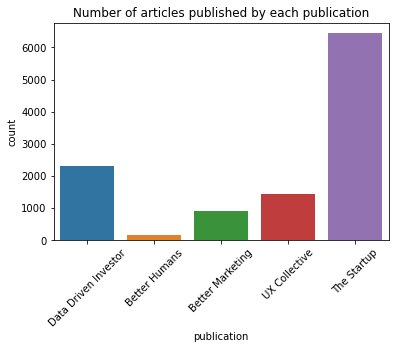

In [20]:
#Number of articles published by each publication

sns.countplot(medium_df["publication"])
plt.title("Number of articles published by each publication")
plt.xticks(rotation=45)

In [24]:
#Number of articles published in each month

medium_dfmonth=medium_df.groupby(["month","publication"])["title"].count().reset_index()
medium_dfmonth["month"]=medium_dfmonth["month"].apply(lambda x:calendar.month_abbr[x])
fig=px.bar(data_frame=medium_dfmonth, x="month", y="title", color="publication")
fig.show()

Now, we will checking the measures of reading time, claps and responses for different publications. As understood from the histogram, there are some outliers present, so we will be checking the median for each of these variables

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Better Humans'),
  Text(1, 0, 'Better Marketing'),
  Text(2, 0, 'The Startup'),
  Text(3, 0, 'UX Collective'),
  Text(4, 0, 'Data Driven Investor')])

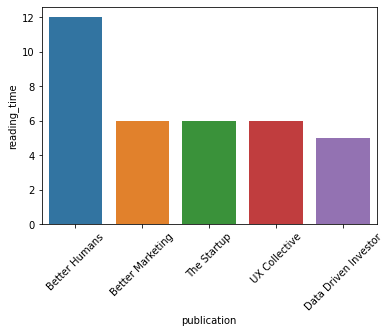

In [25]:
median_readingtime=medium_df.groupby("publication")["reading_time"].median().sort_values(ascending=False).reset_index()
sns.barplot(x="publication", y="reading_time", data=median_readingtime)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Better Humans'),
  Text(1, 0, 'Better Marketing'),
  Text(2, 0, 'UX Collective'),
  Text(3, 0, 'The Startup'),
  Text(4, 0, 'Data Driven Investor')])

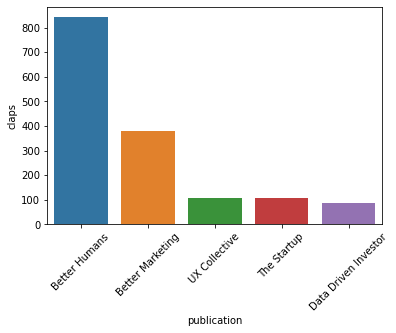

In [26]:
median_claps=medium_df.groupby("publication")["claps"].median().sort_values(ascending=False).reset_index()
sns.barplot(x="publication", y="claps", data=median_claps)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Better Humans'),
  Text(1, 0, 'Better Marketing'),
  Text(2, 0, 'Data Driven Investor'),
  Text(3, 0, 'The Startup'),
  Text(4, 0, 'UX Collective')])

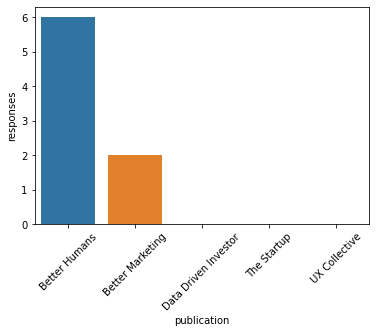

In [27]:
median_responses=medium_df.groupby("publication")["responses"].median().sort_values(ascending=False).reset_index()
sns.barplot(x="publication", y="responses", data=median_responses)
plt.xticks(rotation=45)

Now let's try to find out which day of week has maximum number of articles published. We can plot a graph for month vs day of the week to also understand for each month which day of the week has highest number of articles published

In [28]:
medium_dfdates=medium_df["date"].value_counts().rename_axis('dates').reset_index(name='counts')
medium_dfdates.head()

,dates,counts
0,2020-05-12,184
1,2020-05-06,183
2,2020-05-04,164
3,2020-08-10,164
4,2020-05-20,160


In [29]:
medium_dfdates['month'] = medium_dfdates.dates.dt.month_name()
medium_dfdates['day_of_week'] = medium_dfdates.dates.dt.day_name()
medium_dfdates

,dates,counts,month,day_of_week
0,2020-05-12,184,May,Tuesday
1,2020-05-06,183,May,Wednesday
2,2020-05-04,164,May,Monday
3,2020-08-10,164,August,Monday
4,2020-05-20,160,May,Wednesday
...,...,...,...,...
95,2020-03-21,72,March,Saturday
96,2020-10-31,71,October,Saturday
97,2020-11-14,69,November,Saturday
98,2020-12-24,63,December,Thursday


<AxesSubplot:title={'center':'Day of week vs Month Blogs posted'}, xlabel='day_of_week', ylabel='month'>

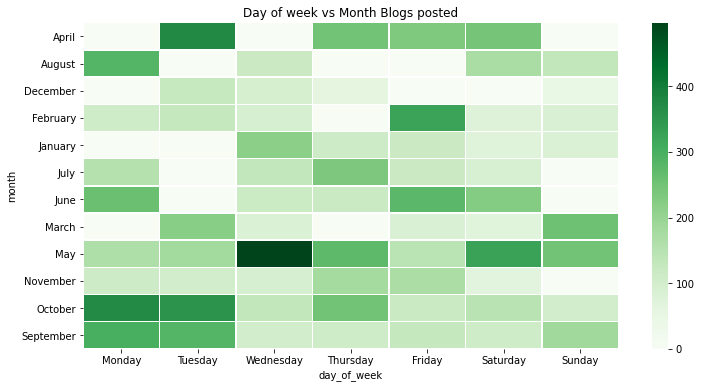

In [30]:
rest_data = medium_dfdates.pivot_table(index='month', columns='day_of_week', values='counts',  aggfunc='sum', fill_value=0)
rest_data = rest_data[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
plt.figure(figsize=(12,6))
plt.title("Day of week vs Month Blogs posted")
sns.heatmap(rest_data, cmap="Greens", linewidths=.5)


Now let's try to find out the correlation between readin_time, claps, responses and title length. Then, we will create a pairplot

<AxesSubplot:>

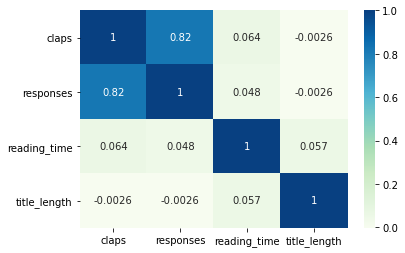

In [31]:
correlation_df=medium_df[["claps","responses","reading_time","title_length"]]
correlation=correlation_df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)

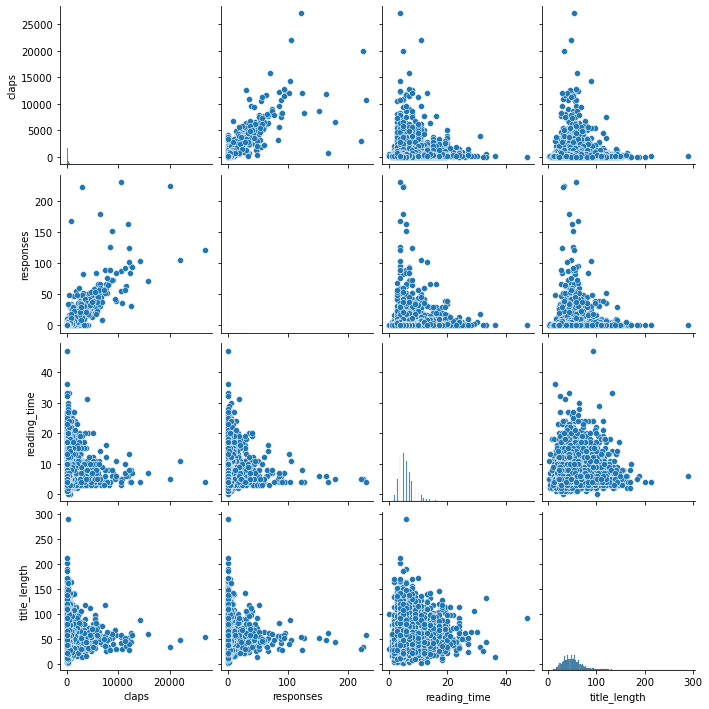

In [32]:
sns.pairplot(correlation_df)

From the pairplot, it can be observed that claps and responses seems to have a positive correlation. However, pairplots of claps and responses with reading_time and title_length looks interesting, we will have a closer look at them

<AxesSubplot:xlabel='reading_time', ylabel='claps'>

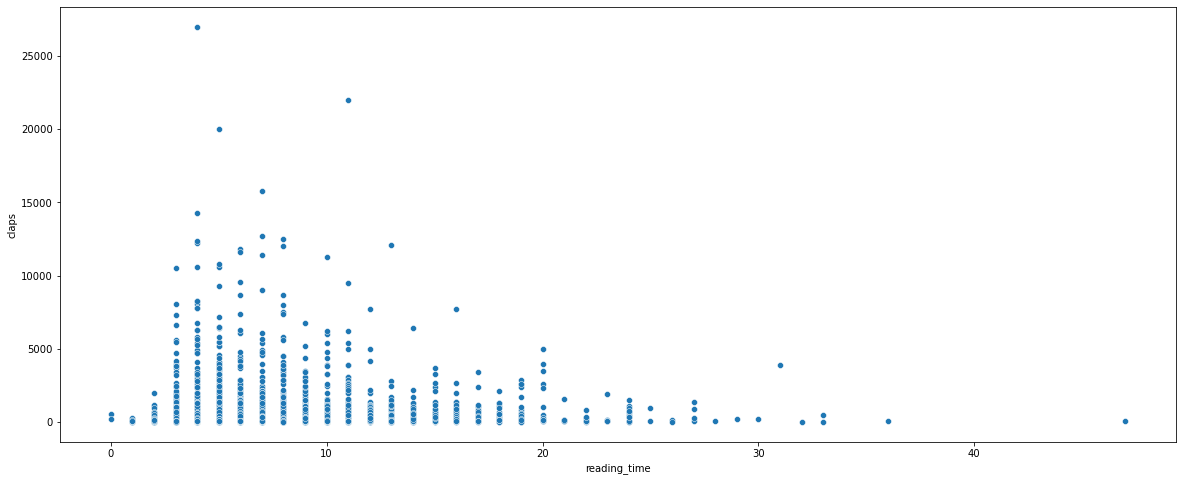

In [37]:
fig = plt.gcf()
fig.set_size_inches(20, 8)
sns.scatterplot(medium_df["reading_time"],medium_df["claps"])

<AxesSubplot:xlabel='reading_time', ylabel='responses'>

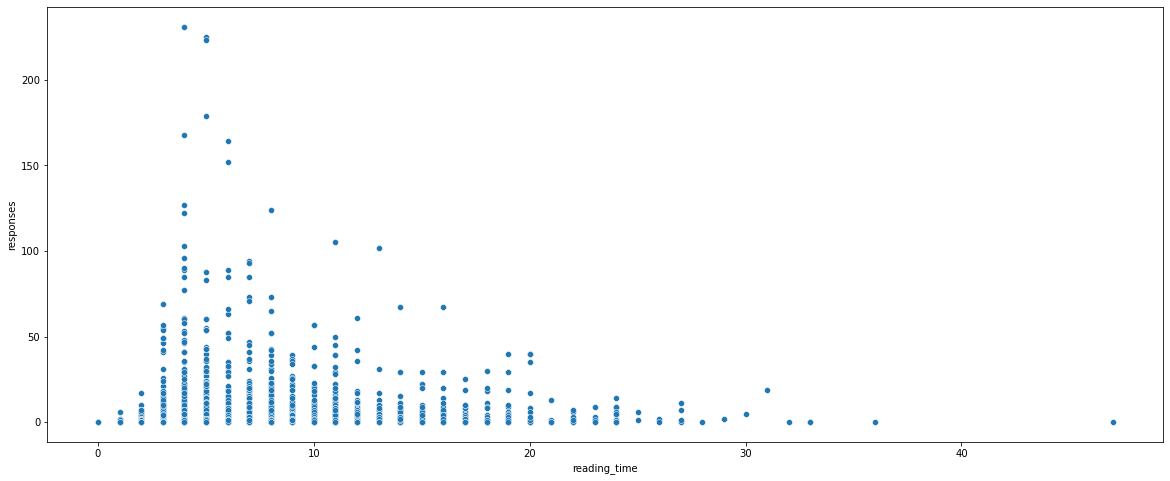

In [40]:
fig = plt.gcf()
fig.set_size_inches(20, 8)
sns.scatterplot(medium_df["reading_time"],medium_df["responses"])

<AxesSubplot:xlabel='title_length', ylabel='claps'>

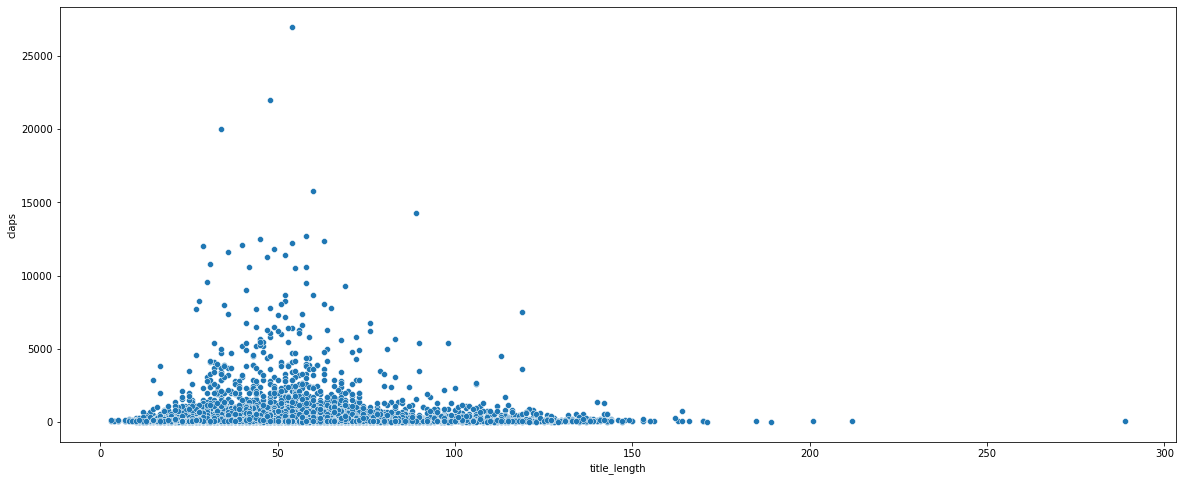

In [41]:
fig = plt.gcf()
fig.set_size_inches(20, 8)
sns.scatterplot(medium_df["title_length"],medium_df["claps"])

<AxesSubplot:xlabel='title_length', ylabel='responses'>

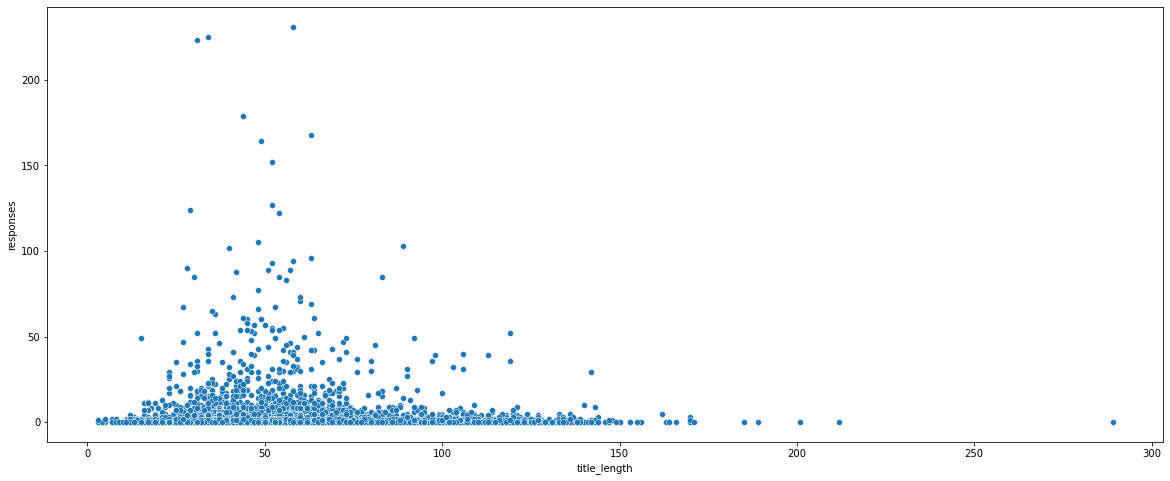

In [42]:
fig = plt.gcf()
fig.set_size_inches(20, 8)
sns.scatterplot(medium_df["title_length"],medium_df["responses"])

<b>Conclusion and Inference:<b>

1. The "Startup Publication" posted most number of articles in year 2020 whereas "Better Human" posted the least number of articles

2. Although, Better Humans have posted least number of articles, they have got better claps and responses than other publications. It can be inferred that Better Humans post articles on the topic which interests user more.

3. May and October are the months in which more number of articles are published compared to other months

4. Wednesday have frequent number of articles published.

5. An articles with reading time of between 4-8 mins and title length of 25-75 characters have better chance of getting claps and responses